# **Import Libraries**

In [ ]:
#import libraries
from matplotlib import pyplot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
%matplotlib inline

# **Import and warehouse data:**

In [ ]:
#Get dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import all the given datasets
#read Part2-Data1 CSV file as a dataframe
df_1 = pd.read_csv (r'/content/drive/MyDrive/project_Part/Part-2/Part2 - Data1.csv')
print (df_1.head())

   ID  Age  CustomerSince  ...  HiddenScore  MonthlyAverageSpend  Level
0   1   25              1  ...            4                  1.6      1
1   2   45             19  ...            3                  1.5      1
2   3   39             15  ...            1                  1.0      1
3   4   35              9  ...            1                  2.7      2
4   5   35              8  ...            4                  1.0      2

[5 rows x 8 columns]


In [ ]:
#read Part2-Data2 CSV file as a dataframe
df_2 = pd.read_csv (r'/content/drive/MyDrive/project_Part/Part-2/Part2 -Data2.csv')
print (df_2.head())

   ID  Mortgage  Security  ...  InternetBanking  CreditCard  LoanOnCard
0   1         0         1  ...                0           0         NaN
1   2         0         1  ...                0           0         NaN
2   3         0         0  ...                0           0         NaN
3   4         0         0  ...                0           0         NaN
4   5         0         0  ...                0           1         NaN

[5 rows x 7 columns]


In [ ]:
# explore shape and size of each
print(df_1.size)
print(df_1.shape)

40000
(5000, 8)


In [ ]:
print(df_2.size)
print(df_2.shape)

35000
(5000, 7)


In [ ]:
df_2 = df_2.drop('ID', axis=1)

In [ ]:
#Merge all datasets onto one and explore final shape and size.
df = pd.concat([df_1, df_2], axis=1)
df.head()

ID  Age  CustomerSince  ...  InternetBanking  CreditCard  LoanOnCard
0   1   25              1  ...                0           0         NaN
1   2   45             19  ...                0           0         NaN
2   3   39             15  ...                0           0         NaN
3   4   35              9  ...                0           0         NaN
4   5   35              8  ...                0           1         NaN

[5 rows x 14 columns]

In [ ]:
print(df.size)
print(df.shape)

70000
(5000, 14)


In [ ]:
#Data summary
df.describe()

ID          Age  ...   CreditCard   LoanOnCard
count  5000.000000  5000.000000  ...  5000.000000  4980.000000
mean   2500.500000    45.338400  ...     0.294000     0.096386
std    1443.520003    11.463166  ...     0.455637     0.295149
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.000000  ...     0.000000     0.000000
75%    3750.250000    55.000000  ...     1.000000     0.000000
max    5000.000000    67.000000  ...     1.000000     1.000000

[8 rows x 14 columns]

# **Data cleansing:**

In [ ]:
#Cleaning the data
df.isnull().values.any()

True

In [ ]:
df1 = df.fillna(0)

In [ ]:
df1

ID  Age  CustomerSince  ...  InternetBanking  CreditCard  LoanOnCard
0        1   25              1  ...                0           0         0.0
1        2   45             19  ...                0           0         0.0
2        3   39             15  ...                0           0         0.0
3        4   35              9  ...                0           0         0.0
4        5   35              8  ...                0           1         0.0
...    ...  ...            ...  ...              ...         ...         ...
4995  4996   29              3  ...                1           0         0.0
4996  4997   30              4  ...                1           0         0.0
4997  4998   63             39  ...                0           0         0.0
4998  4999   65             40  ...                1           0         0.0
4999  5000   28              4  ...                1           1         0.0

[5000 rows x 14 columns]

In [ ]:
# correct the datatypes of each attribute
df1.apply(pd.to_numeric)

ID  Age  CustomerSince  ...  InternetBanking  CreditCard  LoanOnCard
0        1   25              1  ...                0           0         0.0
1        2   45             19  ...                0           0         0.0
2        3   39             15  ...                0           0         0.0
3        4   35              9  ...                0           0         0.0
4        5   35              8  ...                0           1         0.0
...    ...  ...            ...  ...              ...         ...         ...
4995  4996   29              3  ...                1           0         0.0
4996  4997   30              4  ...                1           0         0.0
4997  4998   63             39  ...                0           0         0.0
4998  4999   65             40  ...                1           0         0.0
4999  5000   28              4  ...                1           1         0.0

[5000 rows x 14 columns]

In [ ]:
df1.isnull().values.any()

False

# **Data analysis & visualisation**

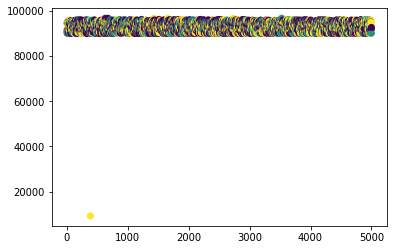

In [ ]:
#Perform detailed statistical analysis on the data
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 4], c=df1["Level"], cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


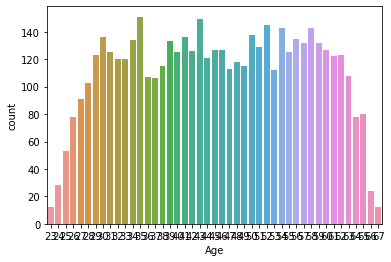

In [ ]:
#Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis
sns.countplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


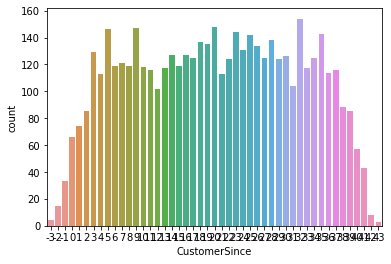

In [ ]:
sns.countplot(df['CustomerSince'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


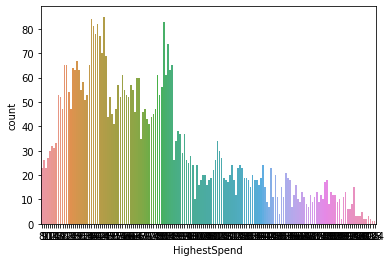

In [ ]:
sns.countplot(df['HighestSpend'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


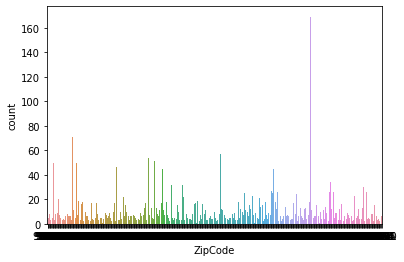

In [ ]:
sns.countplot(df['ZipCode'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


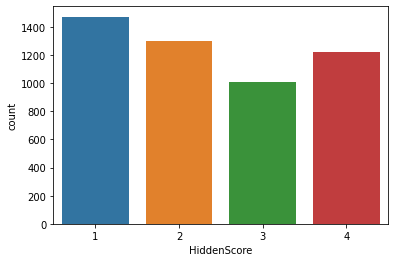

In [ ]:
sns.countplot(df['HiddenScore'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


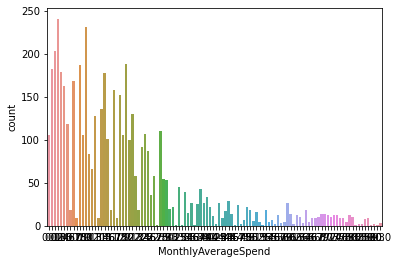

In [ ]:
sns.countplot(df['MonthlyAverageSpend'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


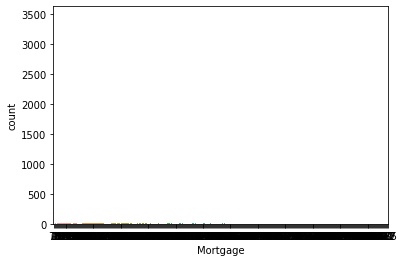

In [ ]:
sns.countplot(df['Mortgage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


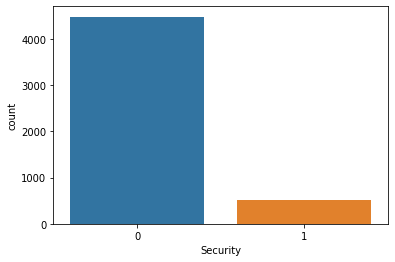

In [ ]:
sns.countplot(df['Security'])

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
fig = px.violin(df1, df1["Level"],box=True,points='all')
fig.show()

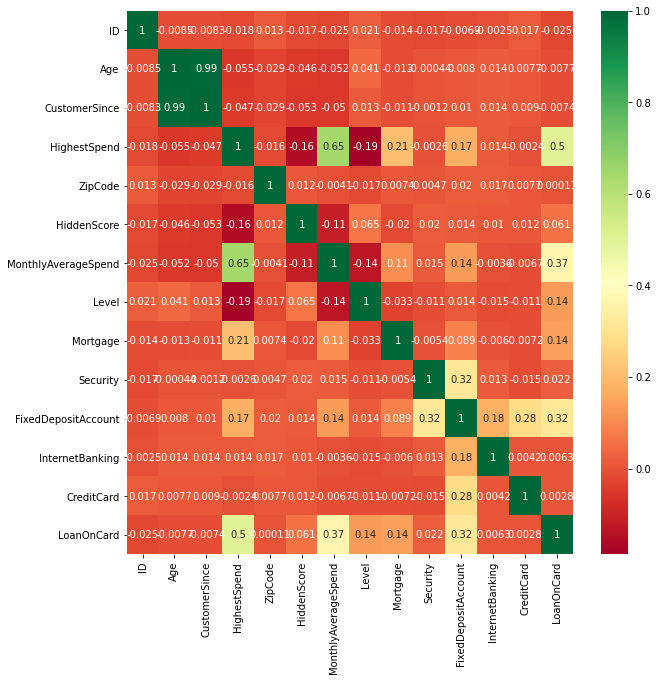

In [ ]:
#Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="RdYlGn")

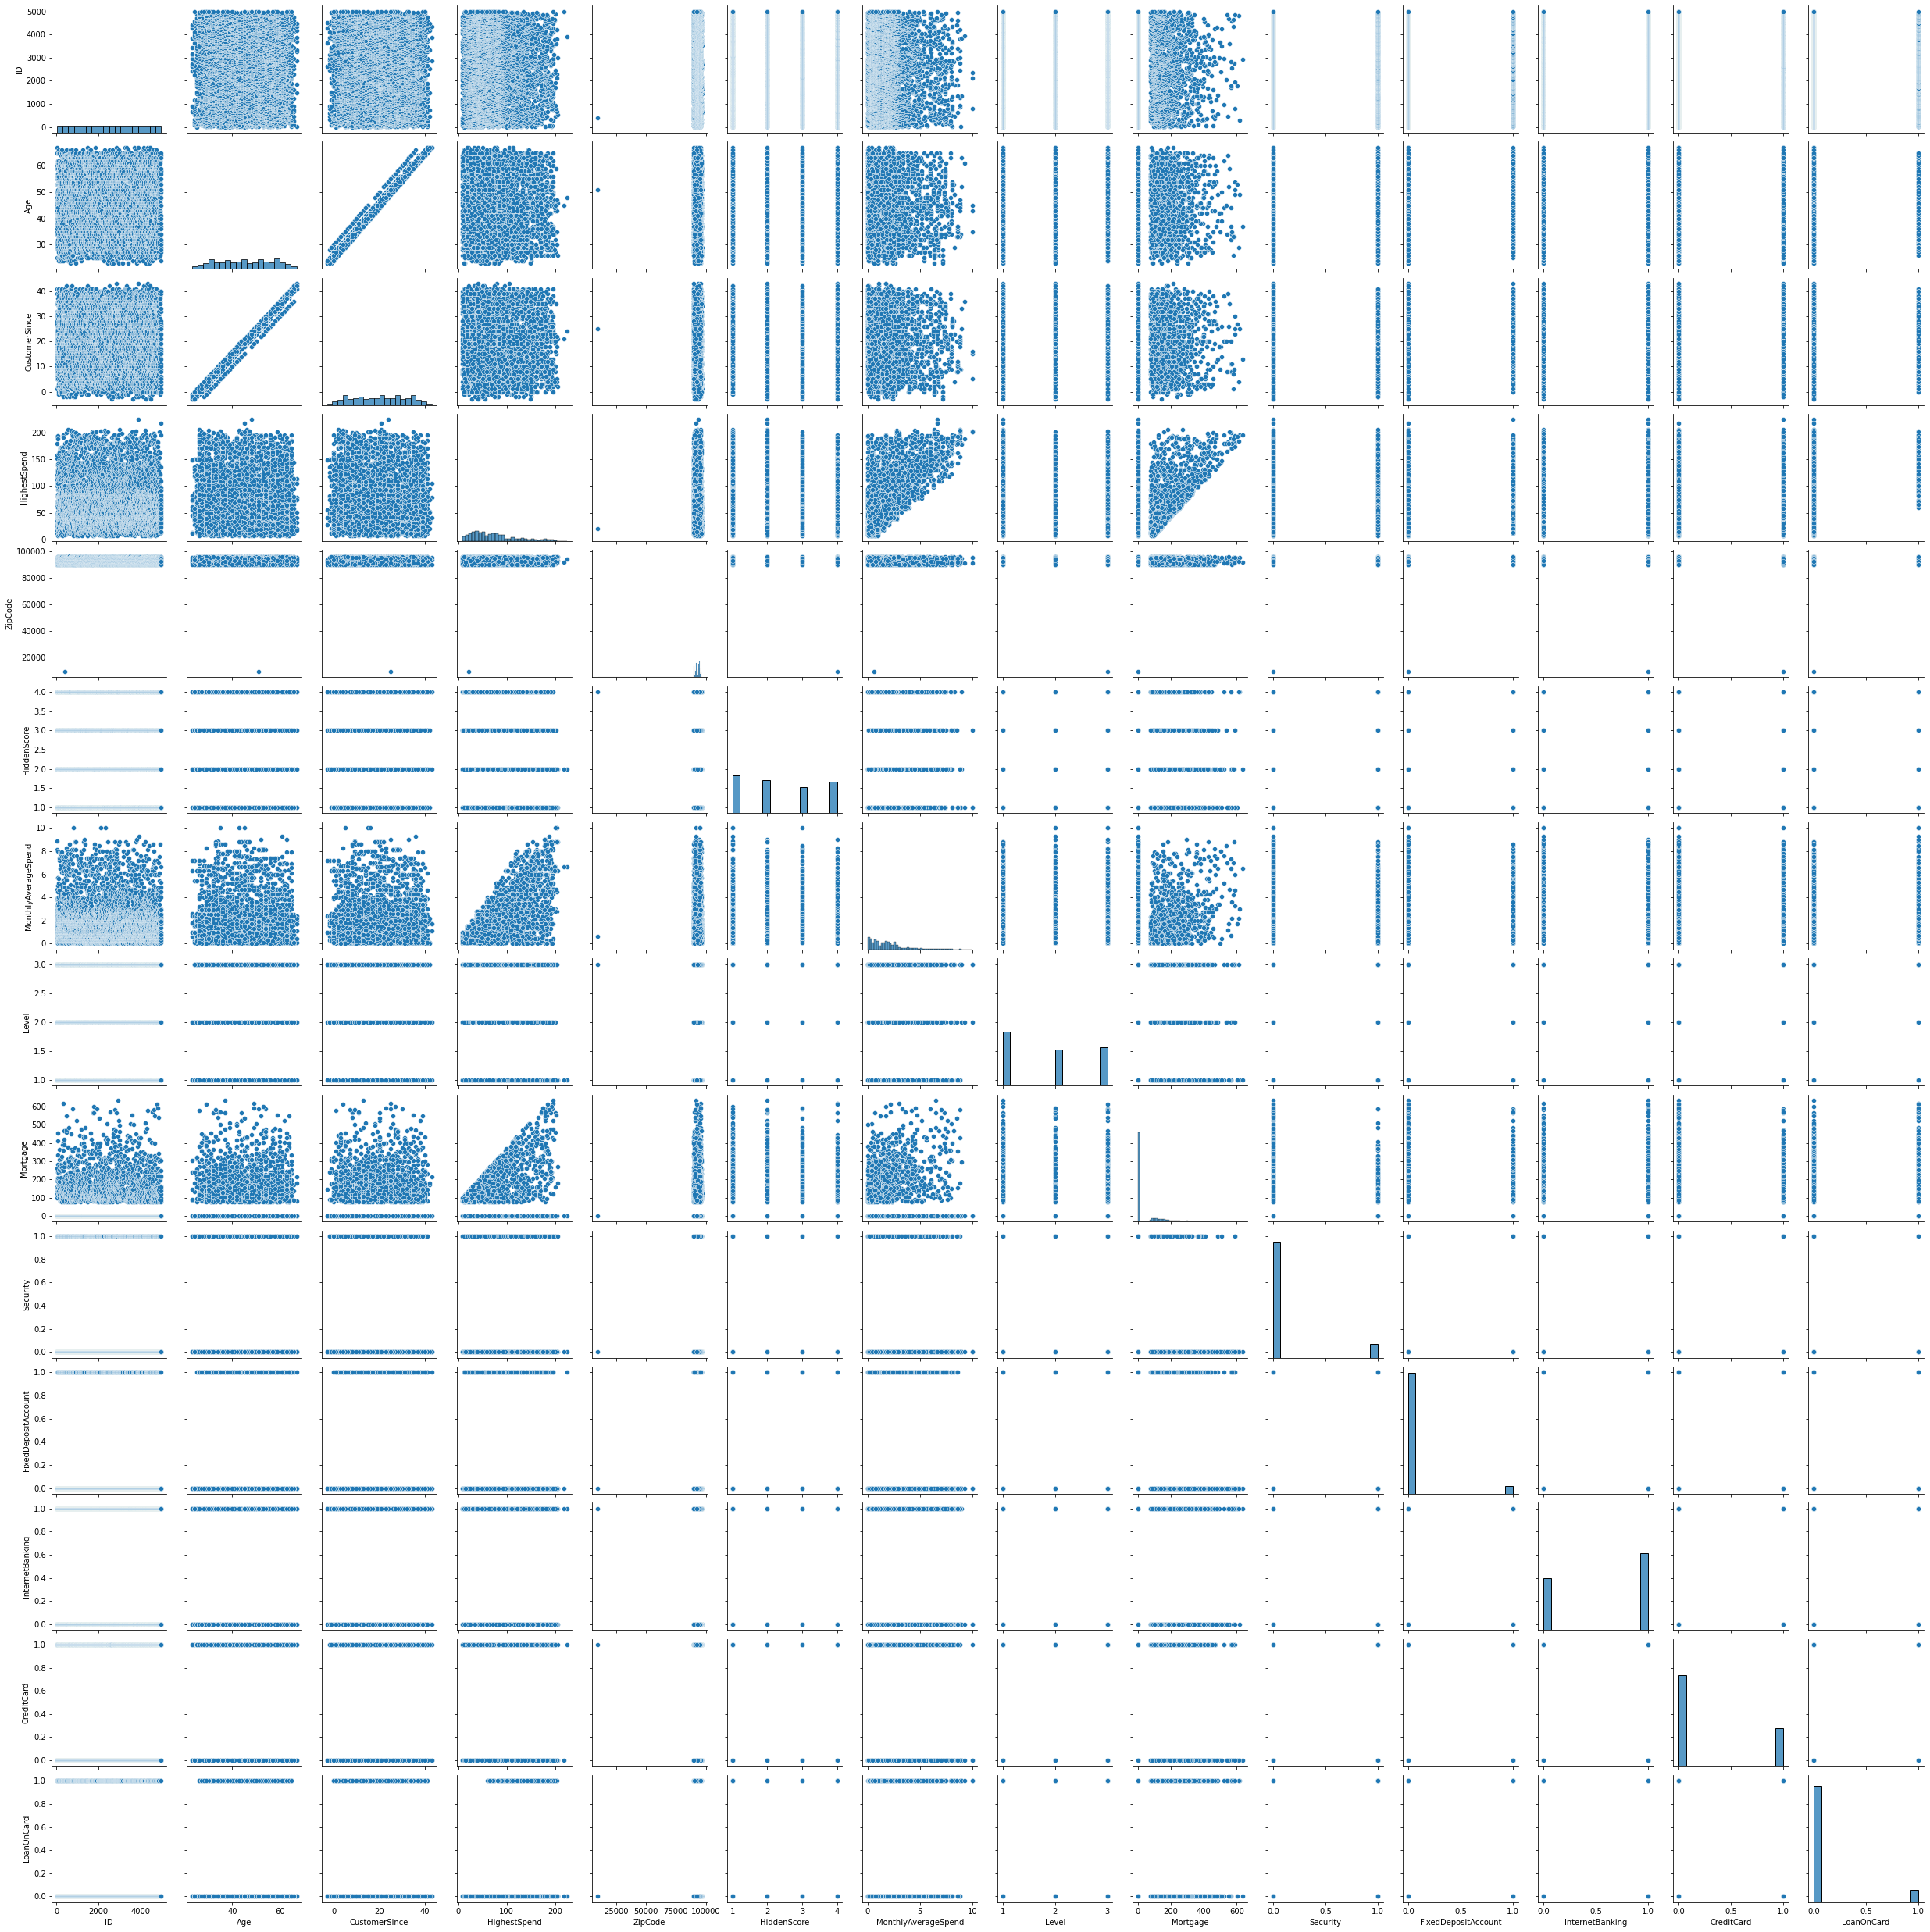

In [ ]:
import seaborn as sns
sns.pairplot(df1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-pack

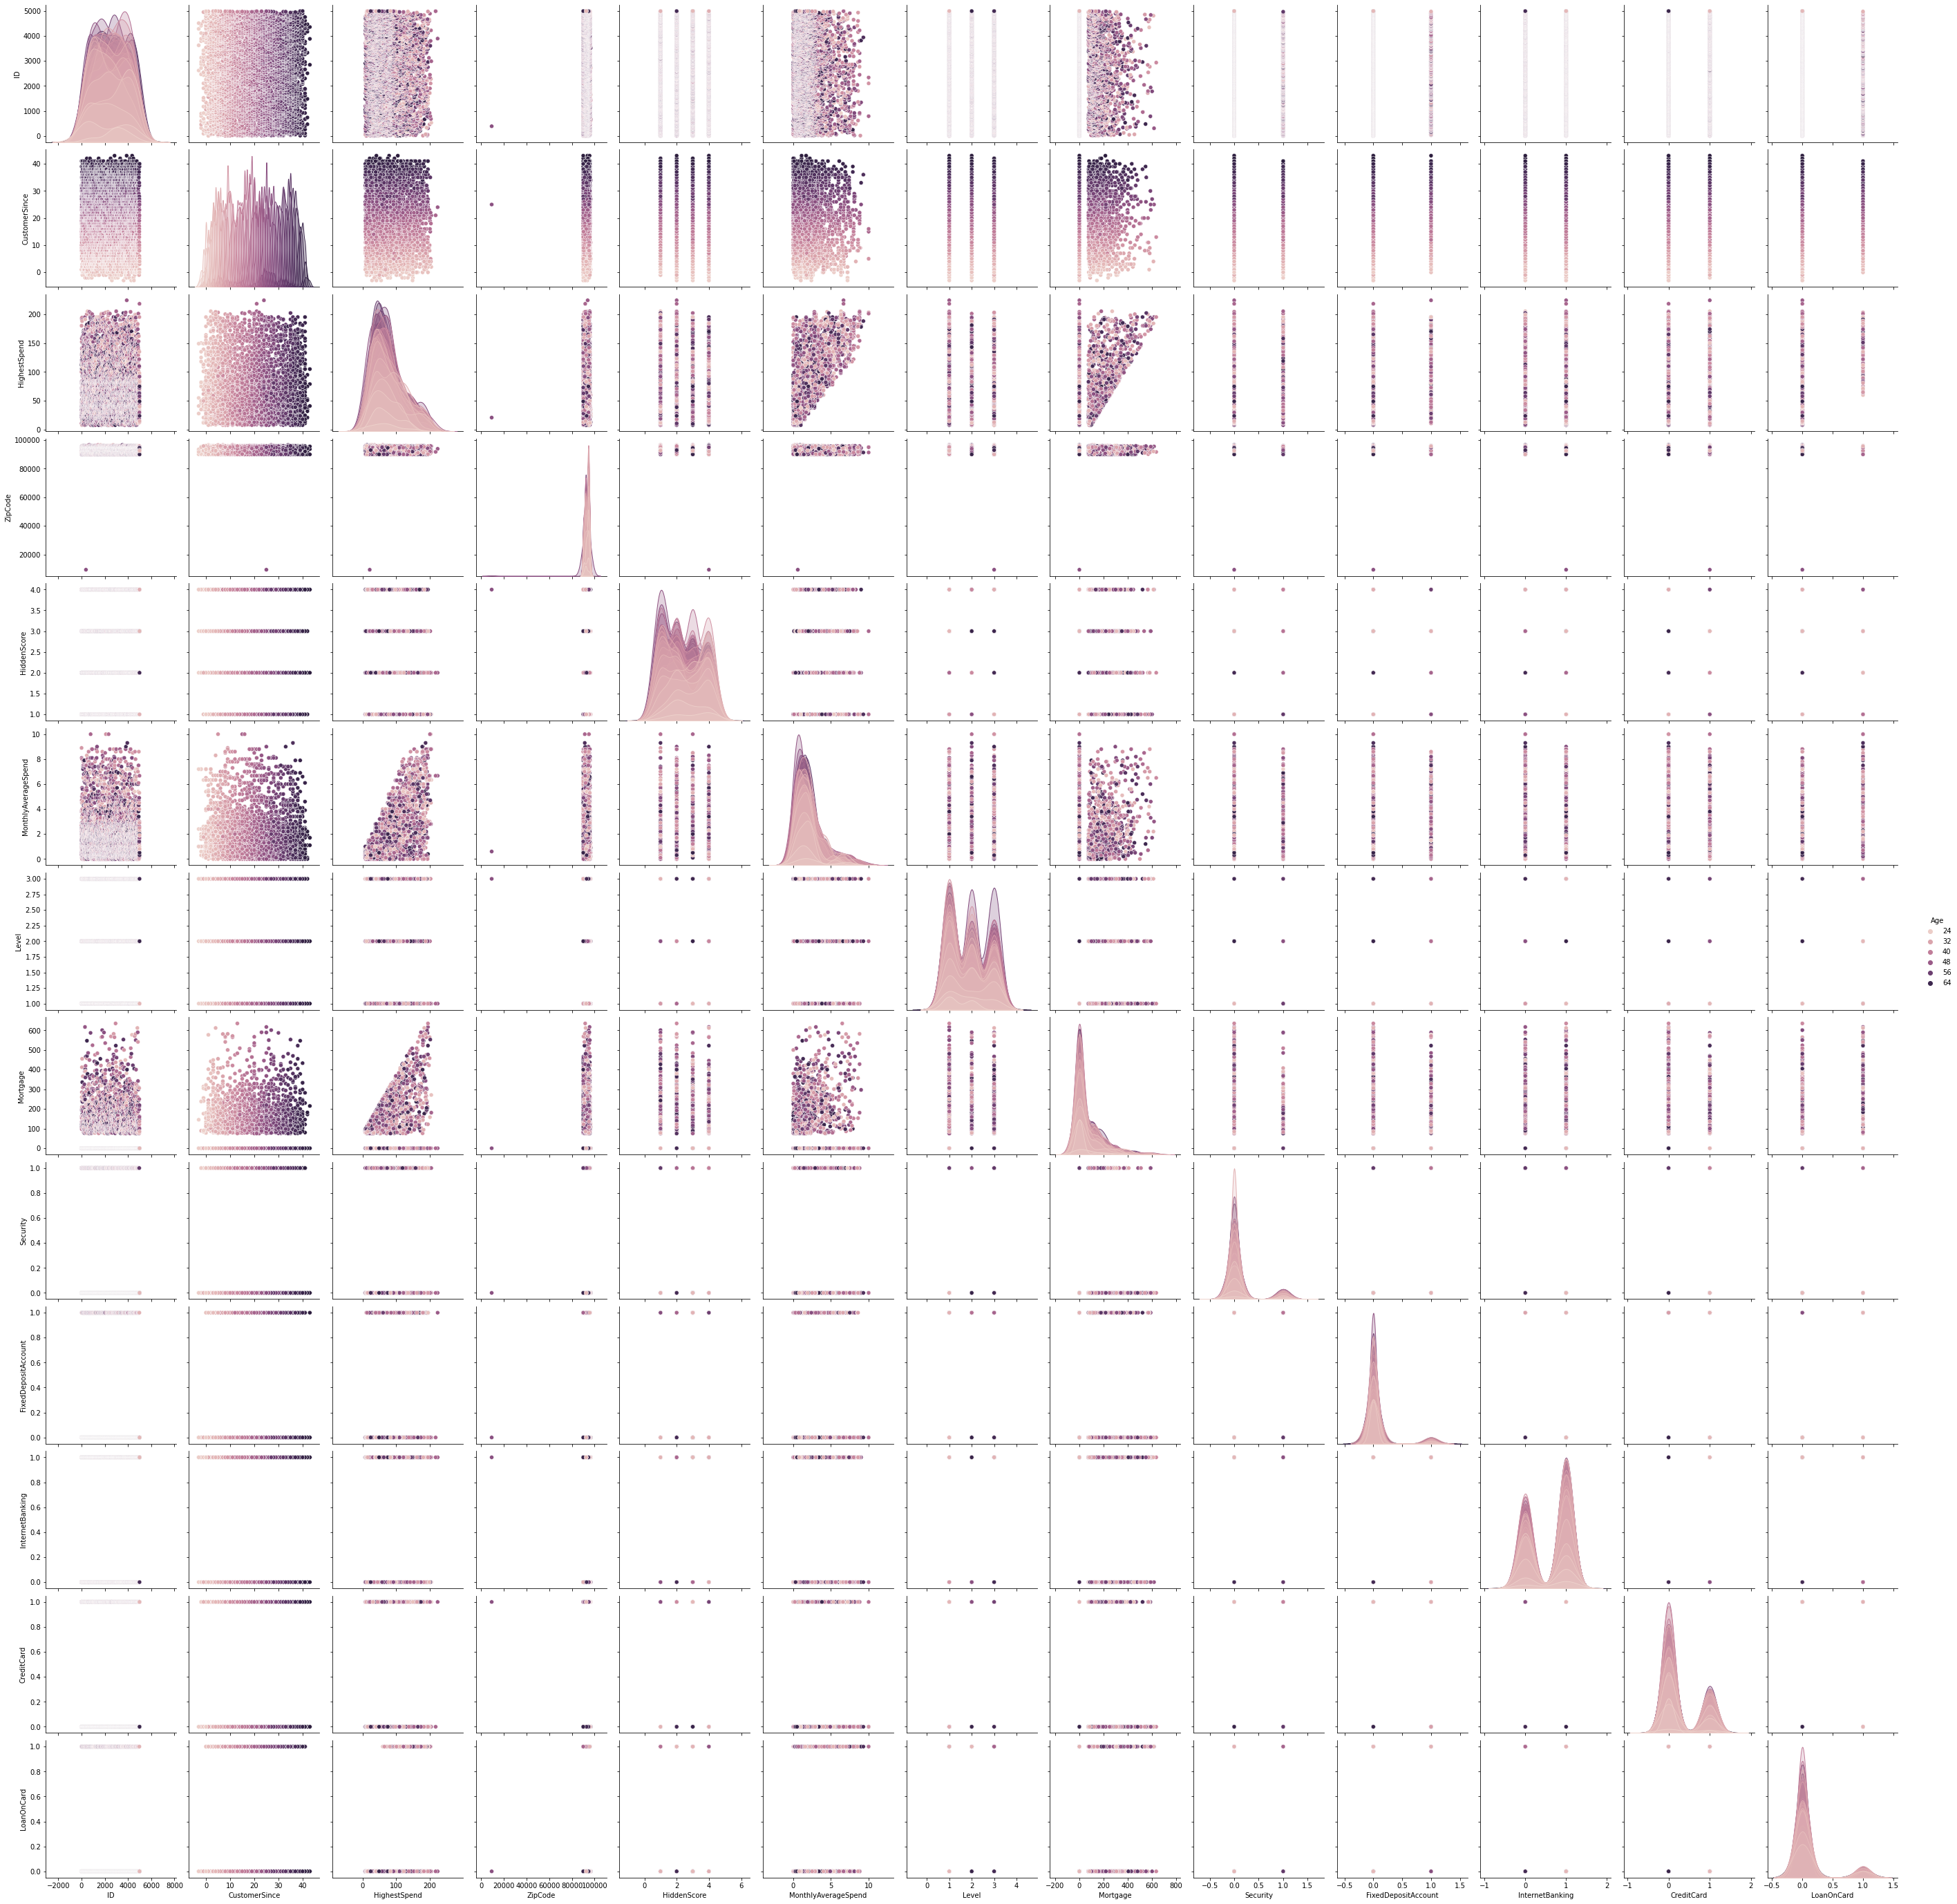

In [ ]:
sns.pairplot(df1, hue = 'Age', size=3)

# **Data pre-processing:** 

In [ ]:
#Segregate predictors vs target attributes 
y = df1['Level']
X = df1.drop('Level', axis=1)

In [ ]:
#Check for target balancing and found imbalanced.
y.value_counts()

1    2096
3    1501
2    1403
Name: Level, dtype: int64

In [ ]:
#Normalize the data
def normalization(input_data):
    minimum = np.amin(input_data, axis=0)
    maximum = np.amax(input_data, axis=0)
    normalized_data = (input_data - minimum)/(maximum - minimum)
    return normalized_data
normalization(X)

ID       Age  CustomerSince  ...  InternetBanking  CreditCard  LoanOnCard
0     0.0000  0.045455       0.086957  ...              0.0         0.0         0.0
1     0.0002  0.500000       0.478261  ...              0.0         0.0         0.0
2     0.0004  0.363636       0.391304  ...              0.0         0.0         0.0
3     0.0006  0.272727       0.260870  ...              0.0         0.0         0.0
4     0.0008  0.272727       0.239130  ...              0.0         1.0         0.0
...      ...       ...            ...  ...              ...         ...         ...
4995  0.9992  0.136364       0.130435  ...              1.0         0.0         0.0
4996  0.9994  0.159091       0.152174  ...              1.0         0.0         0.0
4997  0.9996  0.909091       0.913043  ...              0.0         0.0         0.0
4998  0.9998  0.954545       0.934783  ...              1.0         0.0         0.0
4999  1.0000  0.113636       0.152174  ...              1.0         1.0         0.0

[5000 rows x 13 columns]

# **Model training, testing and tuning:**

In [ ]:
#Perform train-test split. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=6)

In [ ]:
#import libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#Initialize Logistic Regressor 
model = LogisticRegression()

In [ ]:
#Fit the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Let's score the model
model.score(X_test, y_test)

0.41454545454545455

In [ ]:
y_pred = model.fit(X_train, y_train).predict(X_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1650 points : 966


In [ ]:
#import libraries for Naive Bayes classifiers.
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
# Train the model using the training sets
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Let's score the model
model.score(X_test, y_test)

0.4527272727272727

In [ ]:
y_pred = model.fit(X_train, y_train).predict(X_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1650 points : 903


# **Conclusion and improvisation:** 
From the above Logistic Regression model we got the 41% accuracy and got 54% accuracy with Naive-bayes model. In order to improve accuracy, we have to get more balanced data for training. The data without null values, without imbalancing data